In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
# each variable is a column
# each observation is a row
# each type of observational unit is a table

### Bar Charts

In [4]:
pokemon = pd.read_csv('../data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


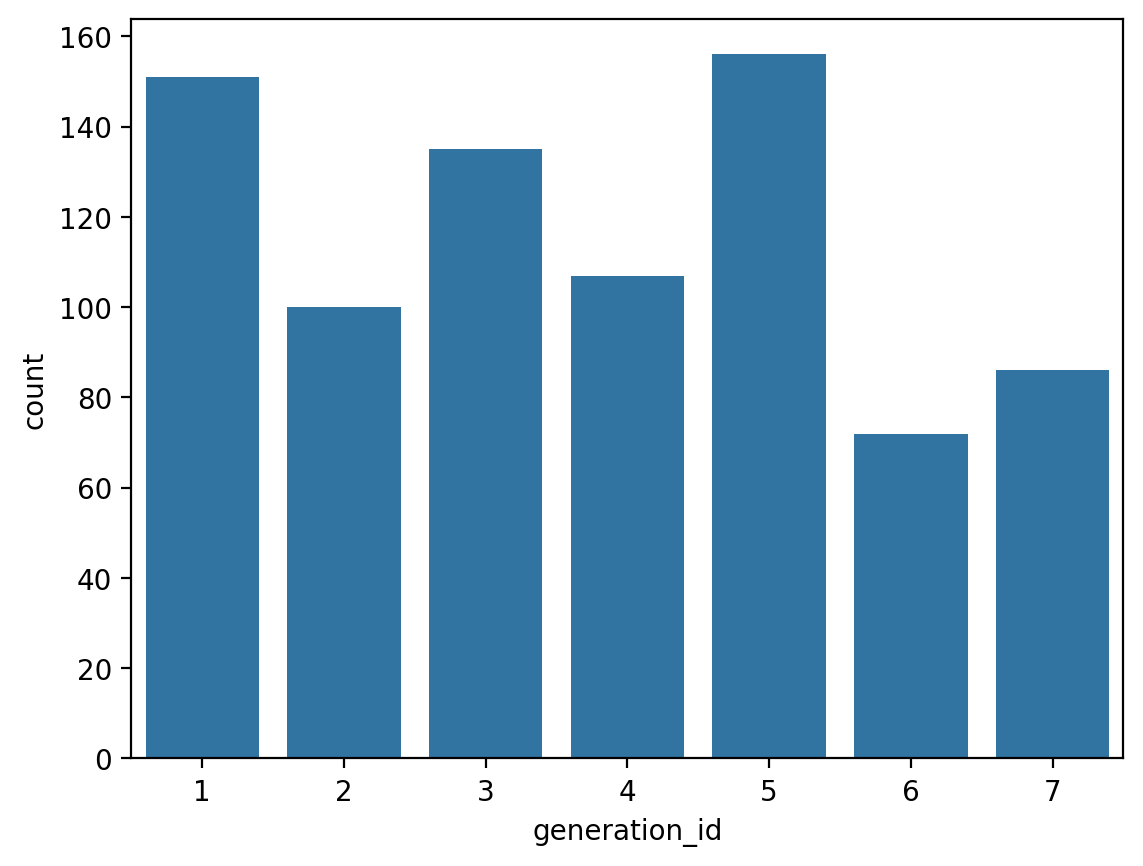

In [5]:
# A semicolon (;) at the end of the statement will supress printing the plotting information
sns.countplot(data=pokemon, x='generation_id');
#plt.show()

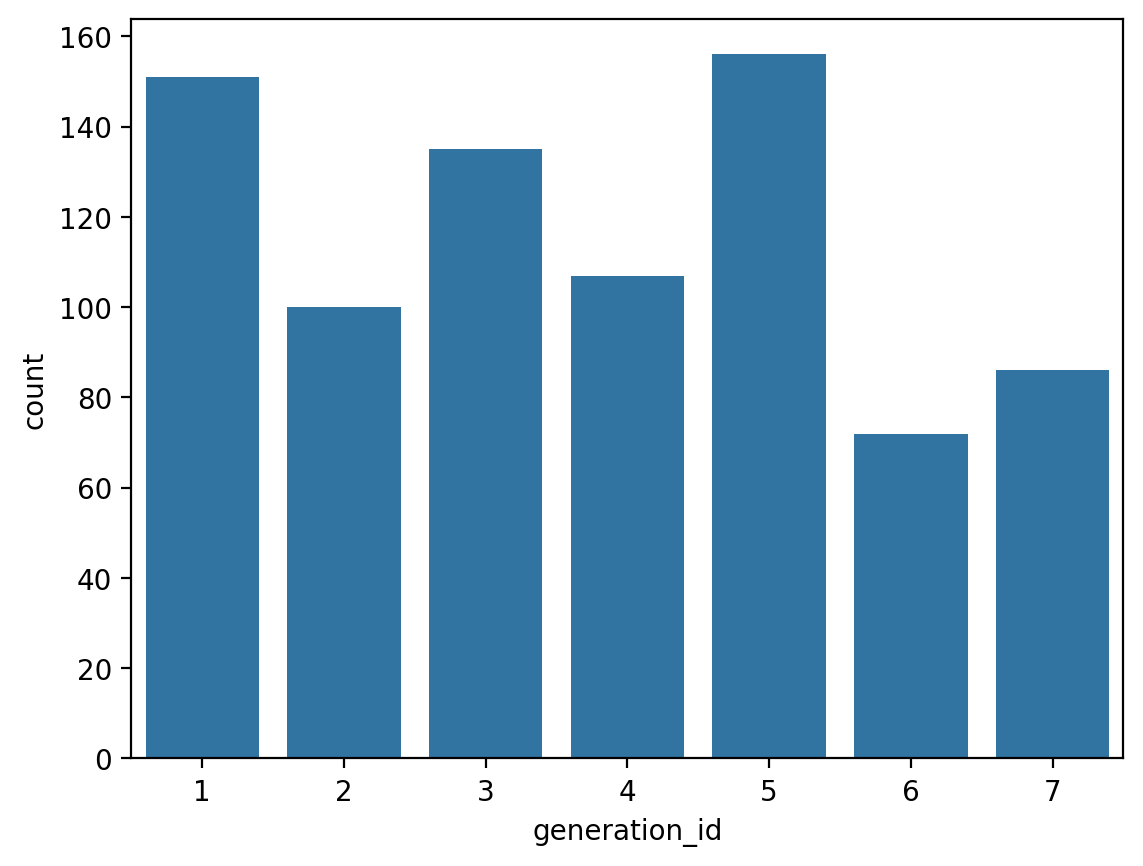

In [6]:
base_color = sns.color_palette()[0]
sns.countplot(data=pokemon, x='generation_id', color=base_color);
#plt.show();


In [7]:
# Bar Chart using the Matplotlib

Text(0, 0.5, 'count')

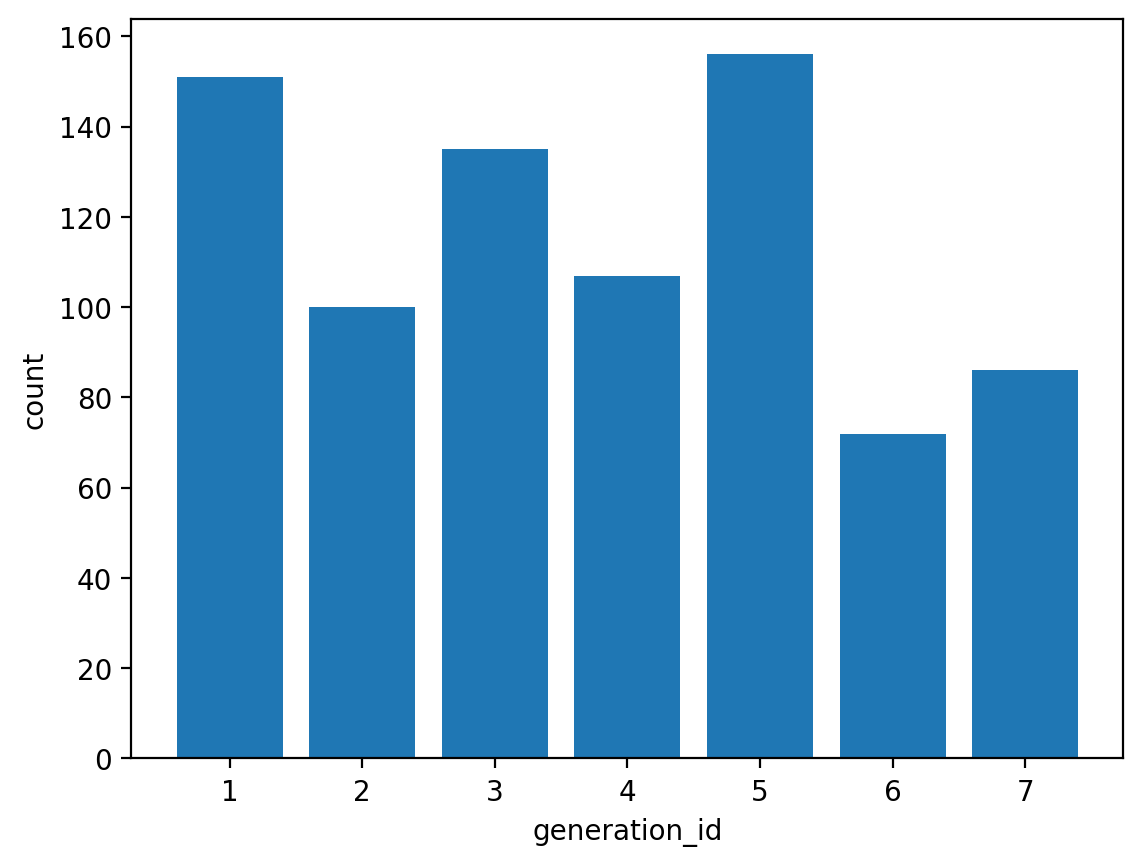

In [8]:
x = pokemon['generation_id'].unique()
y = pokemon['generation_id'].value_counts(sort=False)
plt.bar(x, y)
plt.xlabel('generation_id')
plt.ylabel('count')
# plt.show()

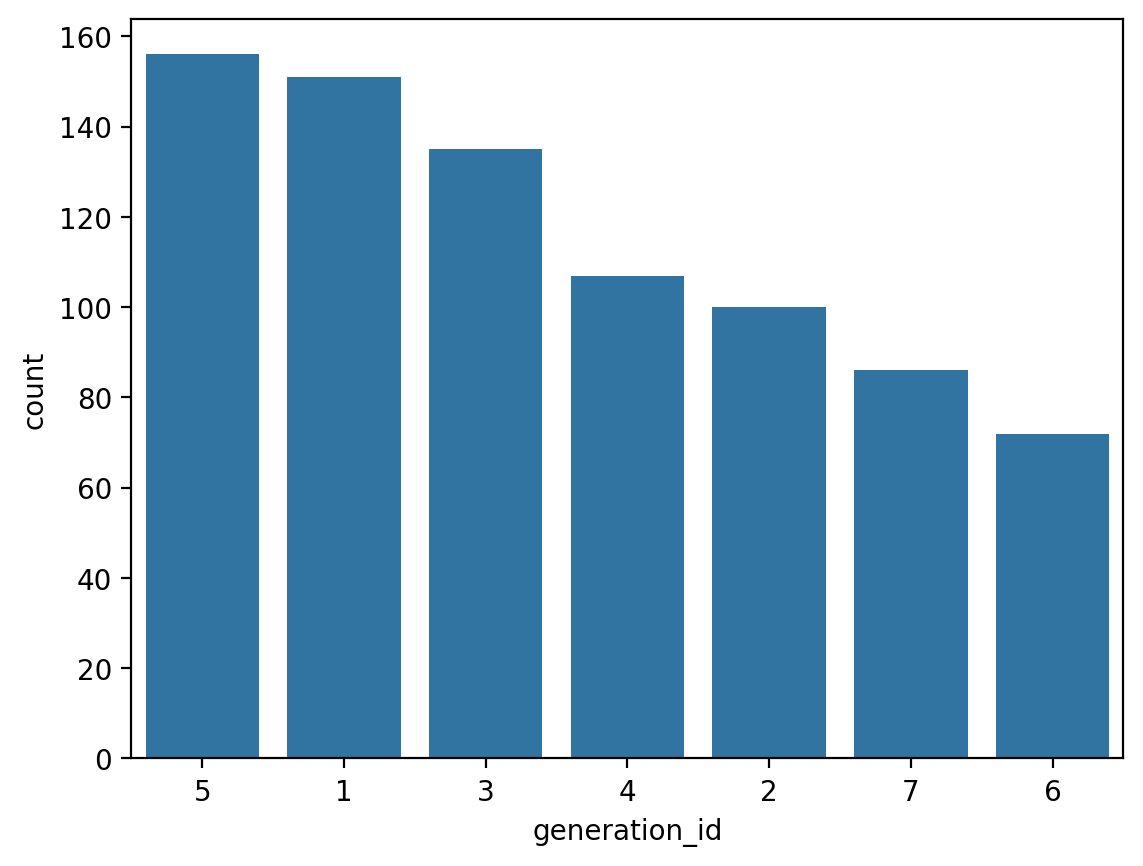

In [9]:
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=[5, 1, 3, 4, 2, 7, 6]);
#plt.show()

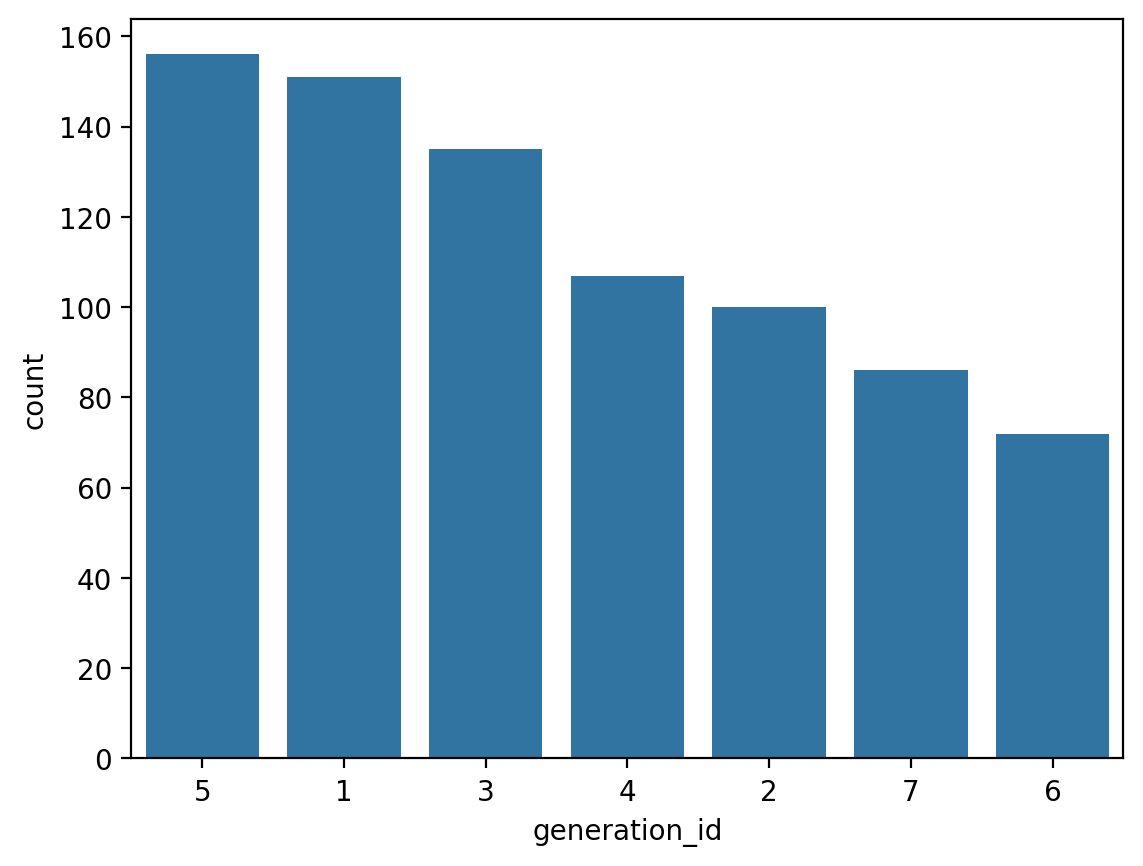

In [10]:
# Dynamic-ordering the bars
freq = pokemon['generation_id'].value_counts()
gen_order = freq.index
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order)
plt.show();

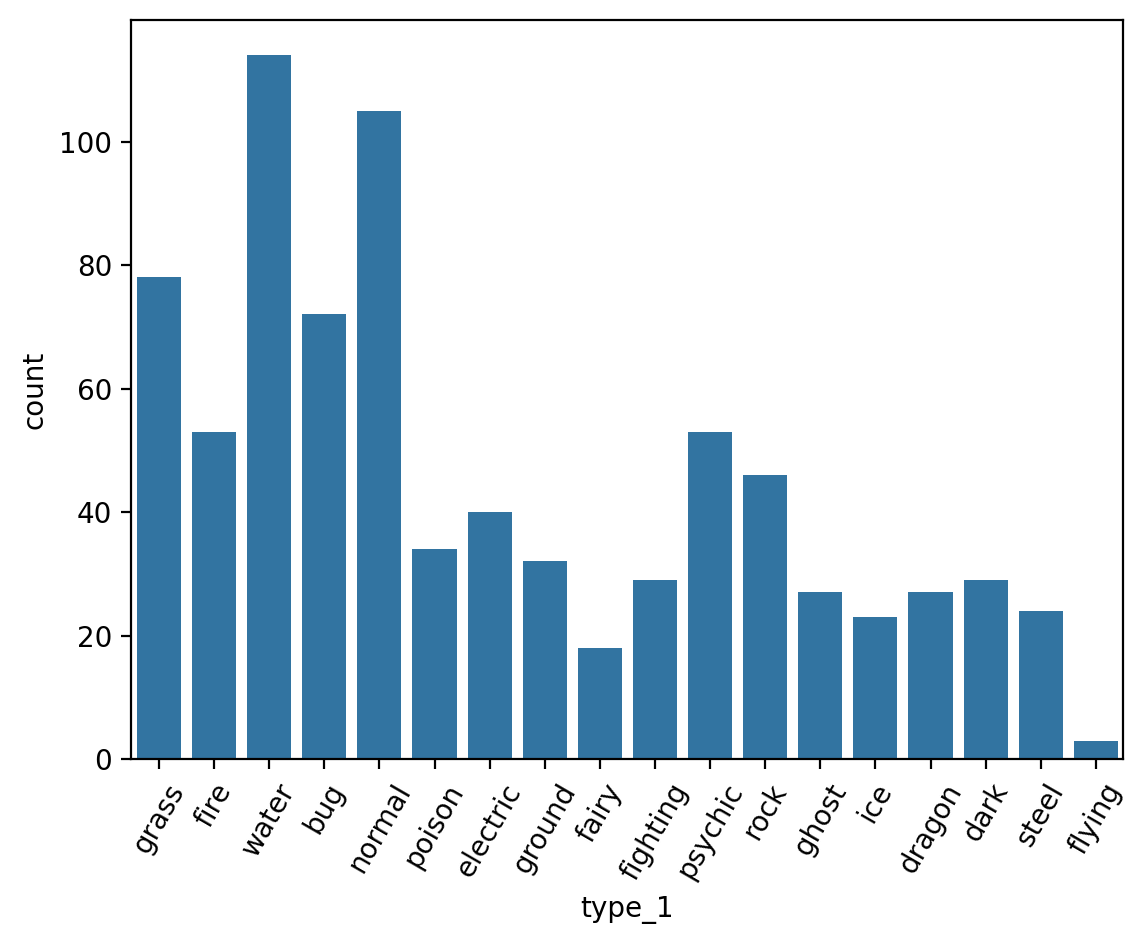

In [11]:
#plt.xticks(rotation=90)
sns.countplot(data=pokemon, x='type_1', color=base_color);
plt.xticks(rotation=60);

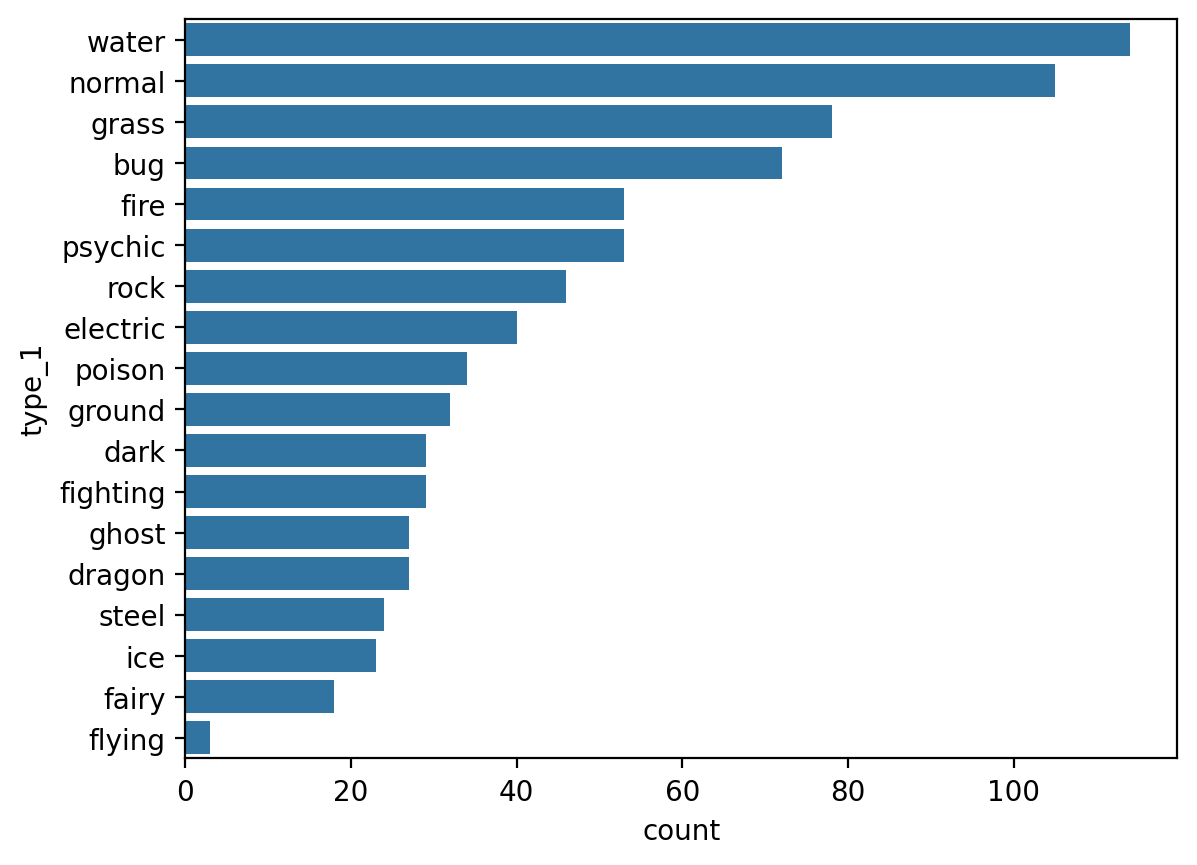

In [12]:
# Rotate the axes clockwise
type_order = pokemon['type_1'].value_counts().index
sns.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

### Absolute vs. Relative Frequency

In [13]:
pokemon = pd.read_csv('../data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [14]:
# pandas.DataFrame.melt()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [15]:
type_counts = pkmn_types['type'].value_counts()
type_counts

type
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: count, dtype: int64

In [16]:
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object', name='type')

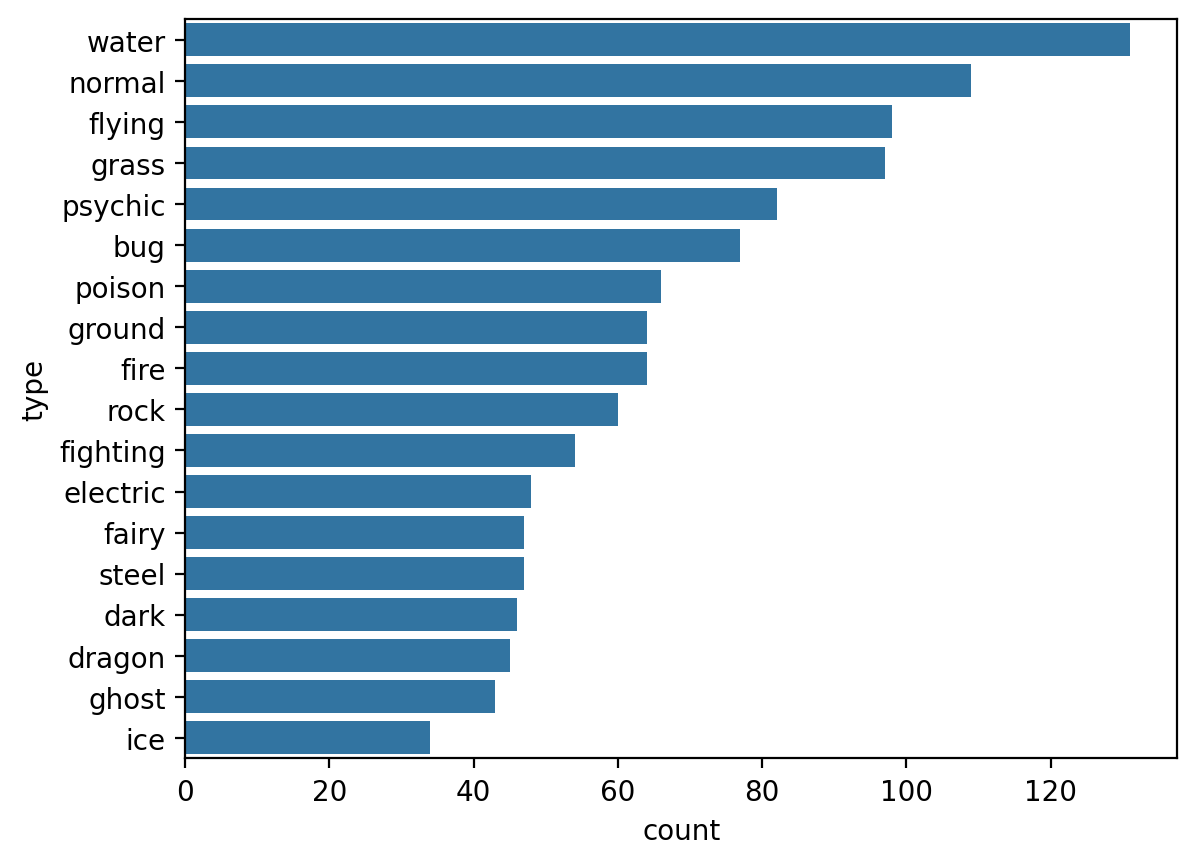

In [17]:
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

In [18]:
n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts.iloc[0]
max_prop = max_type_count / n_pokemon
max_prop

0.10808580858085809

In [19]:
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [20]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

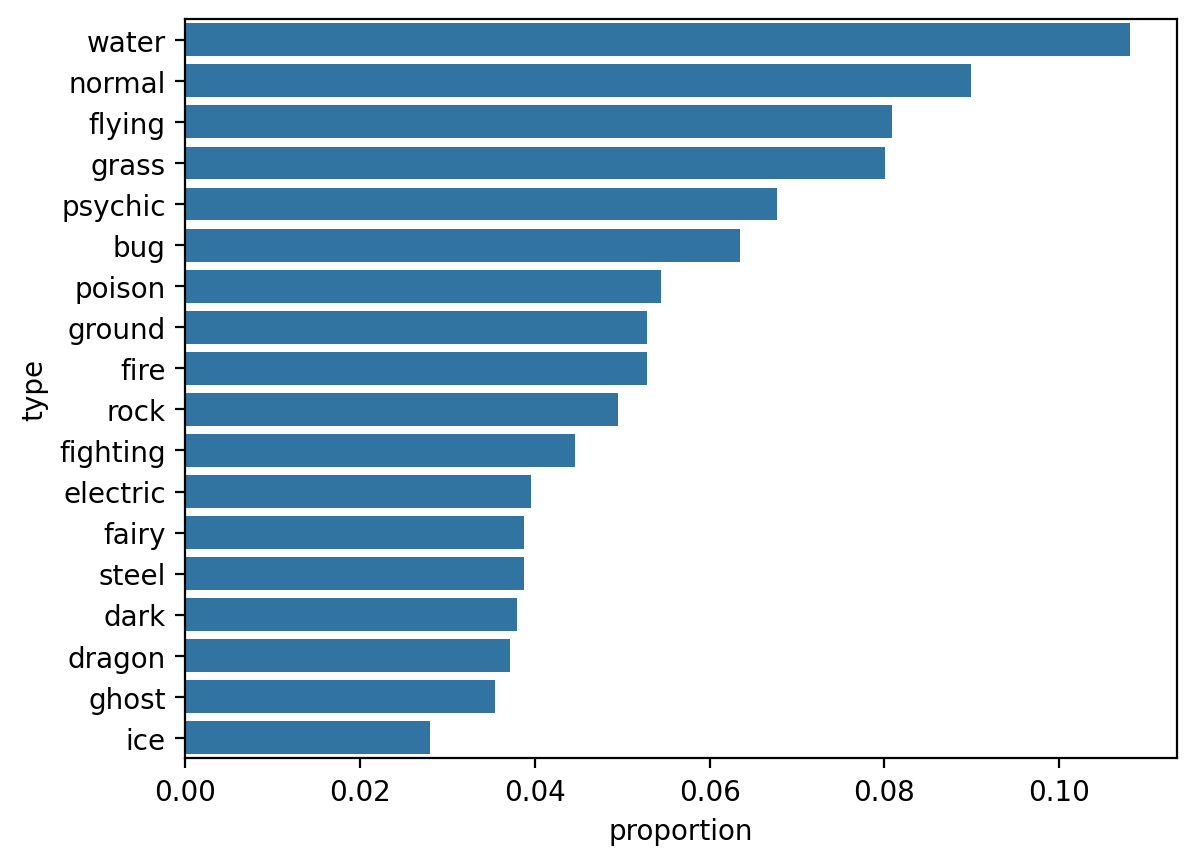

In [21]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
plt.xticks(tick_props * n_pokemon, tick_names)  # !!! important
plt.xlabel('proportion');

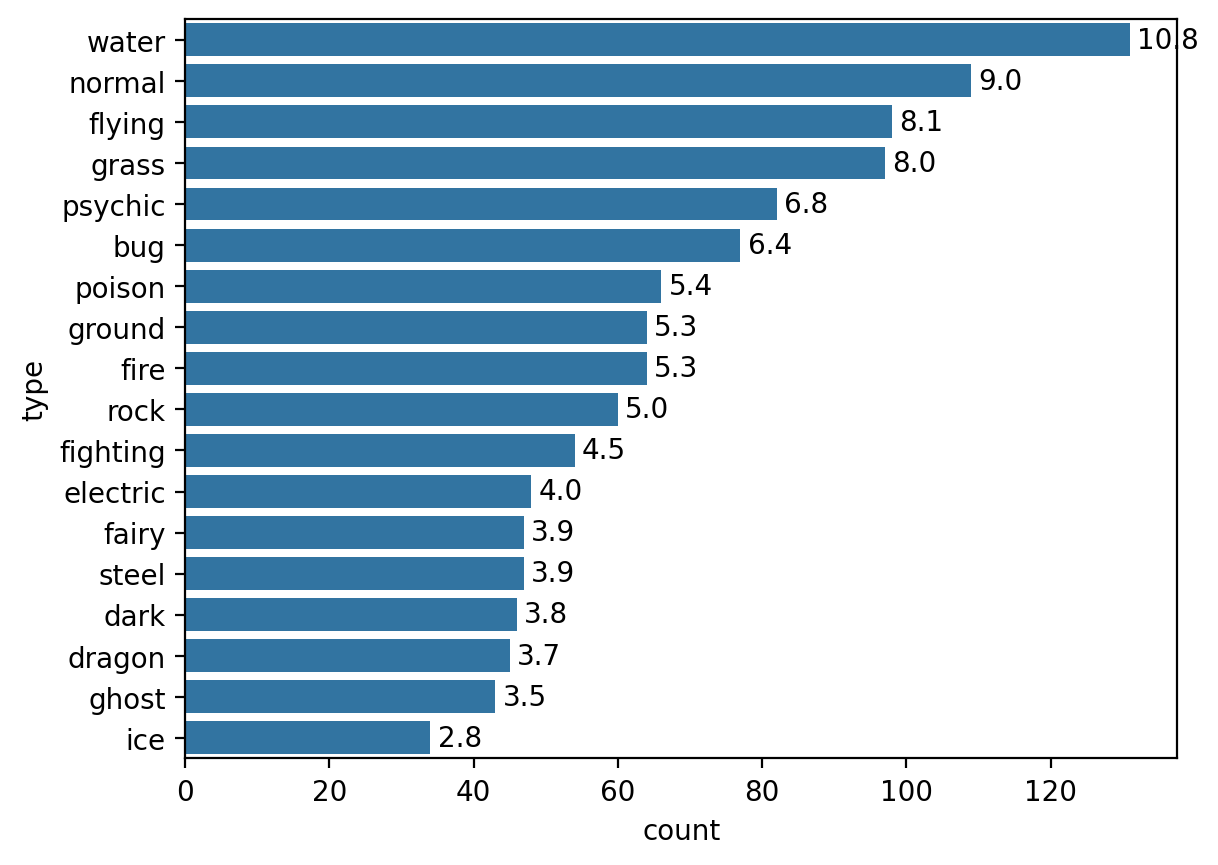

In [22]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
for i in range(type_counts.shape[0]):
    count = type_counts.iloc[i]
    pct_string = '{:0.1f}'.format(100 * count / n_pokemon)
    plt.text(count + 1, i, pct_string, va='center')

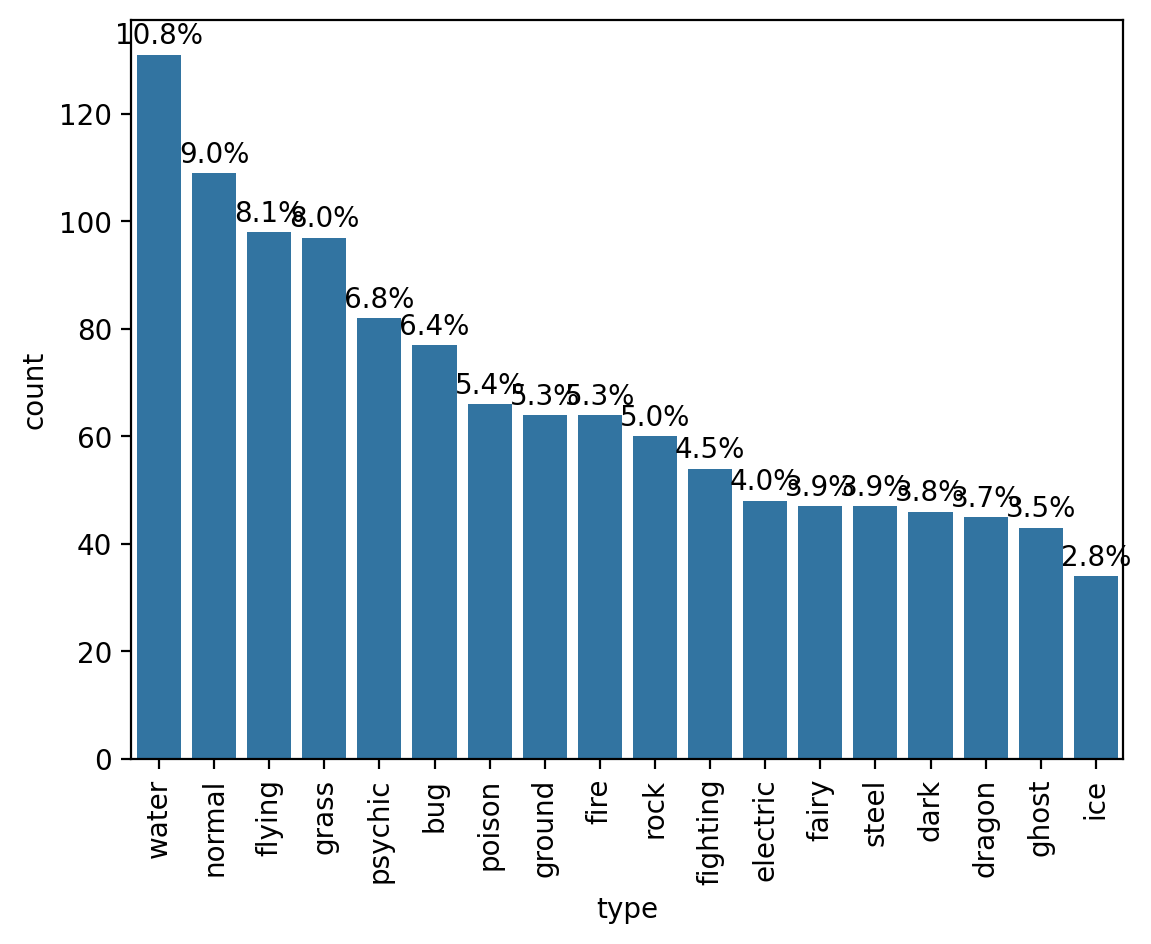

In [23]:
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90)

for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(loc, count + 2, pct_string, ha='center', color='black')

from matplotlib import rcParams

# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12, 4

In [24]:
# reset
plt.rcdefaults()

### Counting Missing Data

In [25]:
sales_data = pd.read_csv('../data/sales_data.csv')
sales_data.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [26]:
sales_data.shape

(8190, 12)

In [27]:
sales_data.isnull()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [28]:
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [29]:
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
na_counts

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

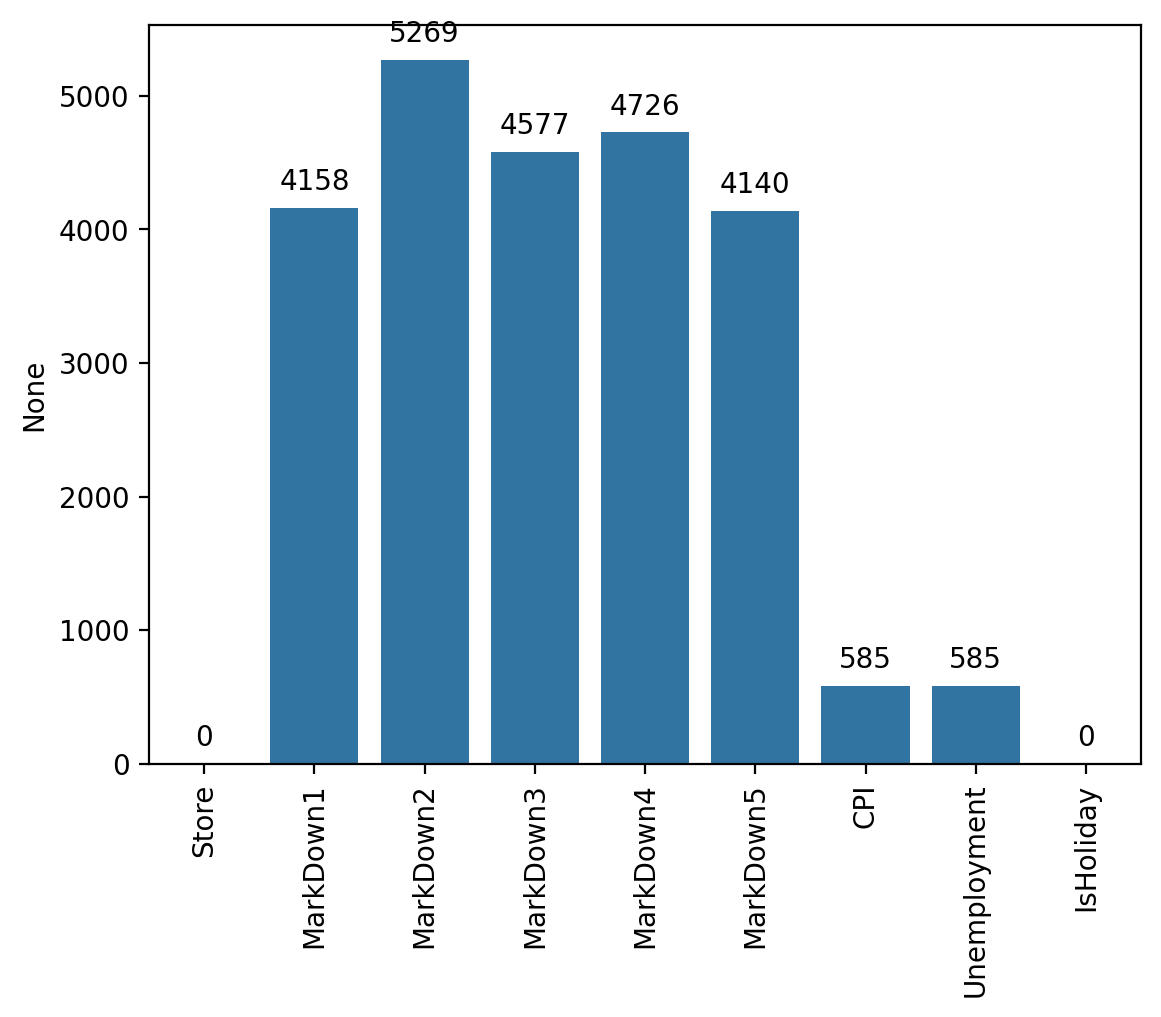

In [30]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x=na_counts.index.values, y=na_counts)
plt.xticks(rotation=90)
for i in range(na_counts.shape[0]):
    count = na_counts.iloc[i]
    plt.text(i, count + 300, count, ha='center', va='top')

### Pie Charts

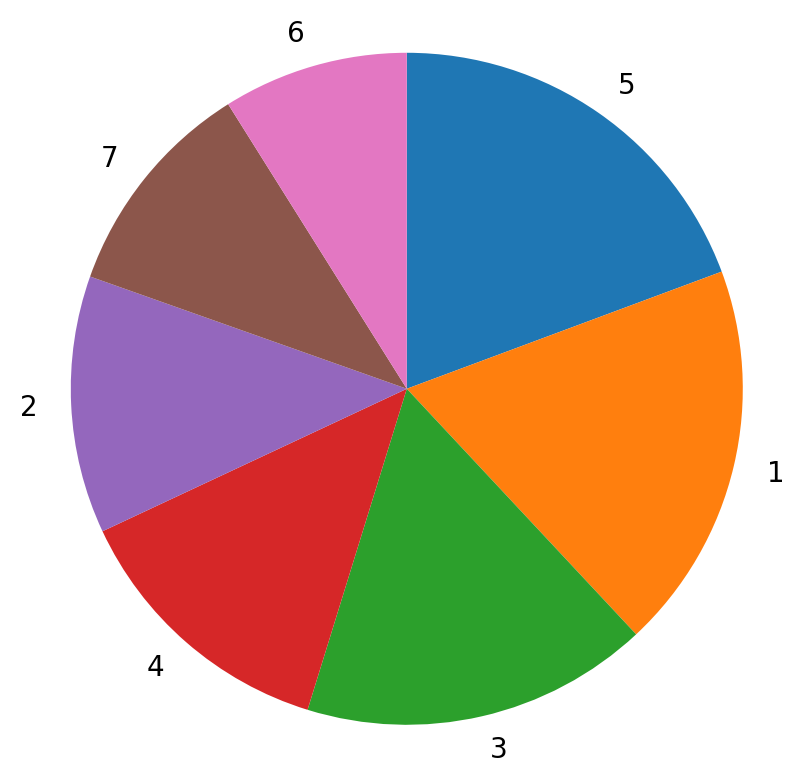

In [31]:
# matplotlib.pyplot.pie(x_data, labels, colors, startangle, counterclock, wedgeprops)
# matplotlib.pyplot.axis(*args, emit=True,* *kwargs)
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False)
plt.axis('square');

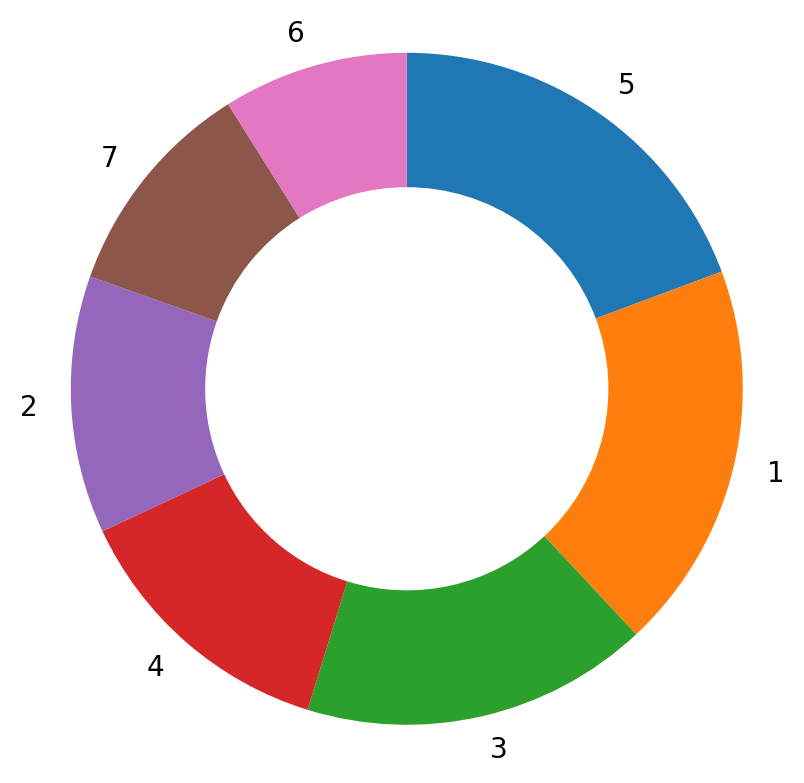

In [32]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False, wedgeprops={'width': 0.4})
plt.axis('square');

### Histograms

In [33]:
pokemon = pd.read_csv('../data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


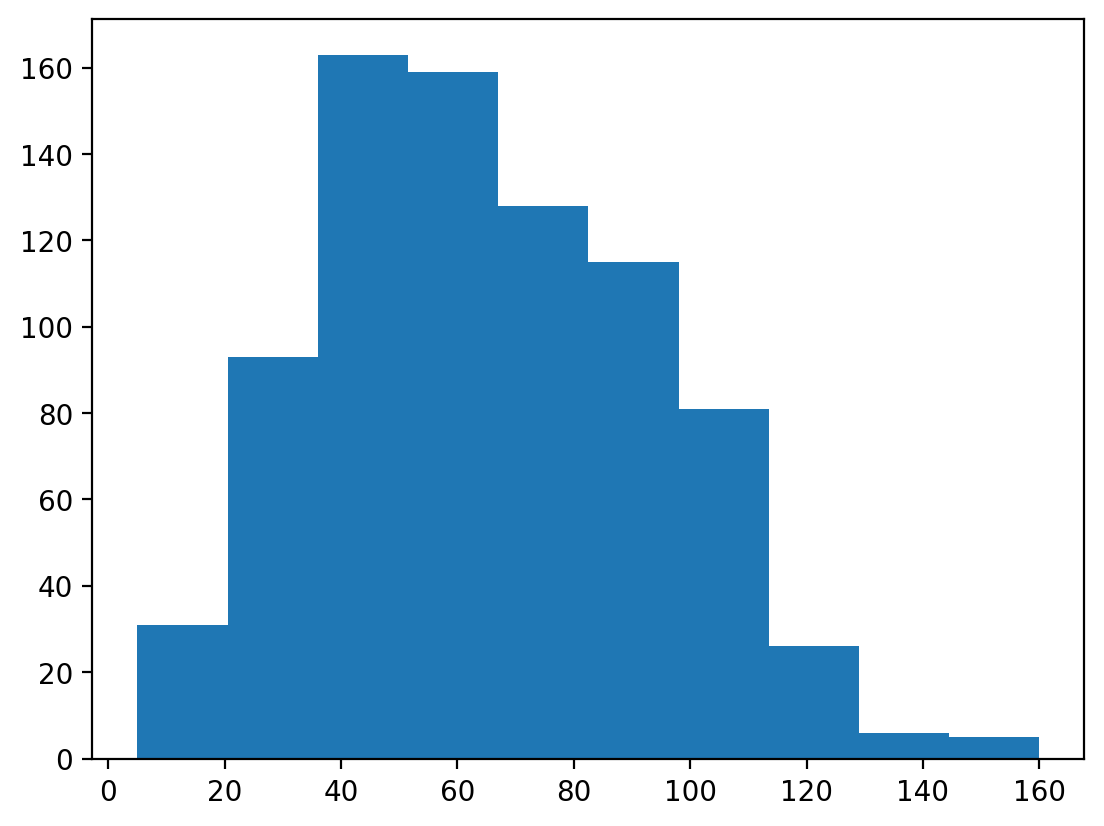

In [34]:
plt.hist(data=pokemon, x='speed');

In [35]:
pokemon['speed'].describe()

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <BarContainer object of 20 artists>)

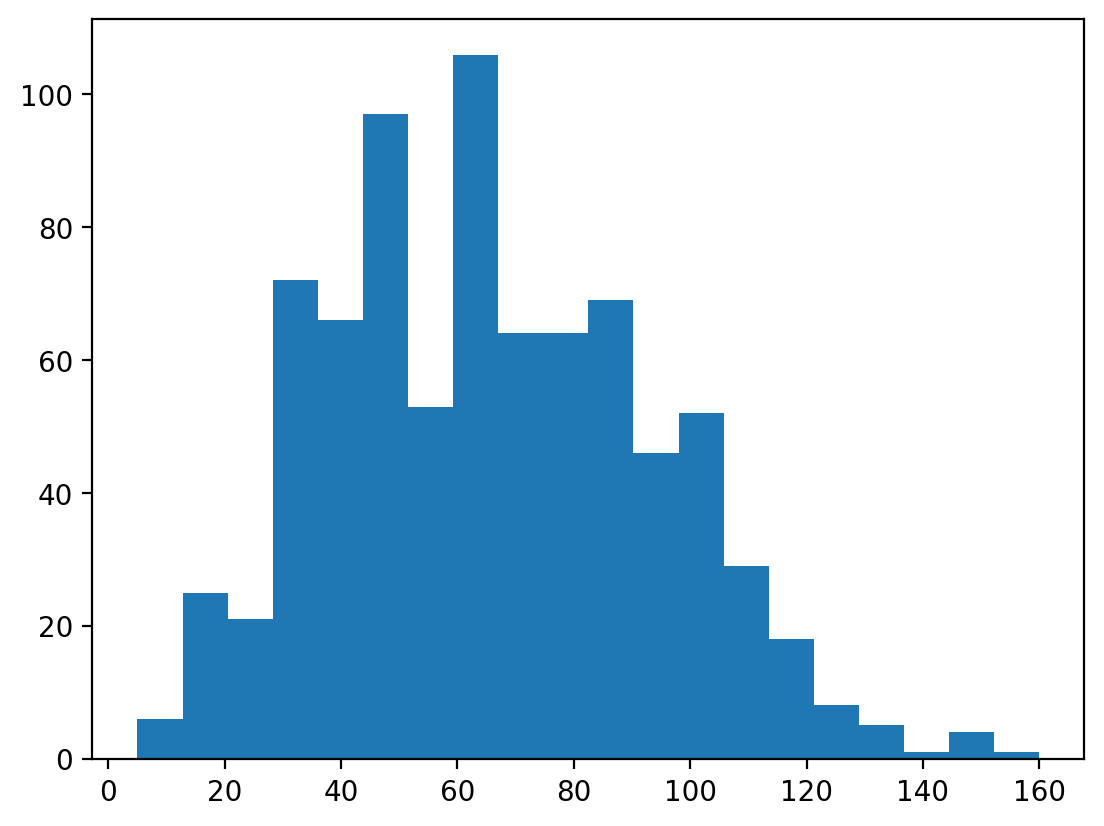

In [36]:
plt.hist(data=pokemon, x='speed', bins=20)

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.]),
 <BarContainer object of 32 artists>)

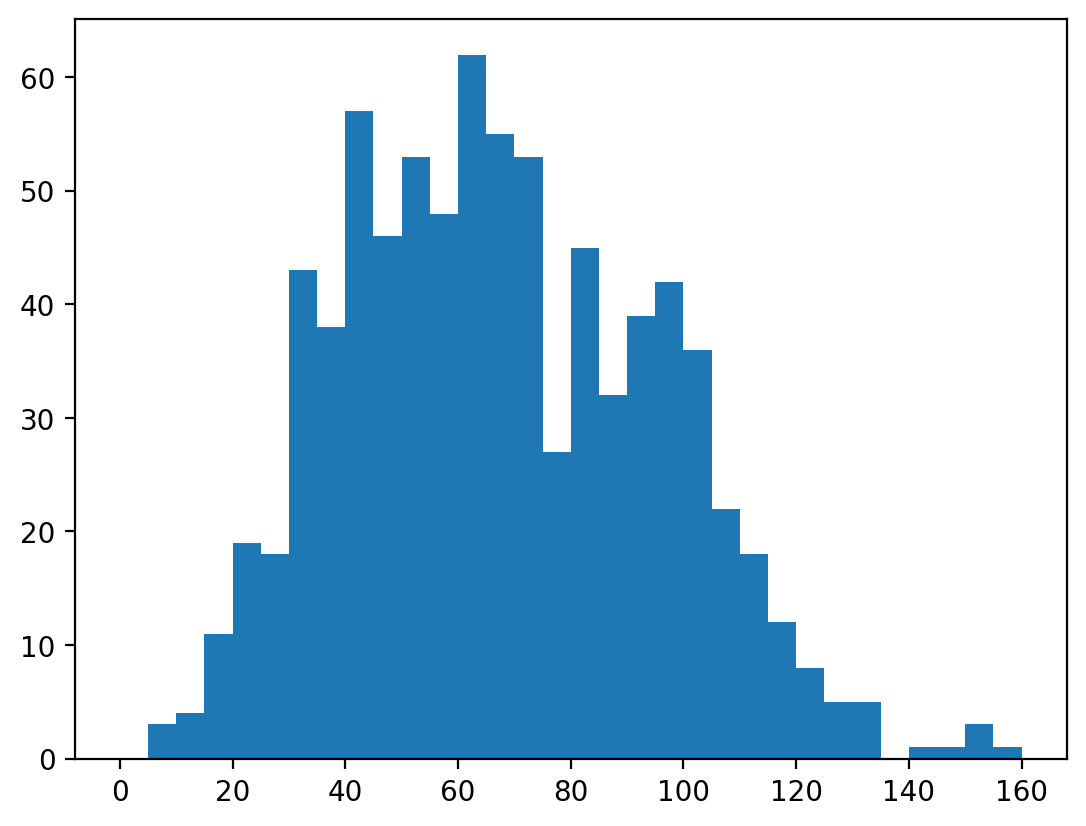

In [37]:
bins = np.arange(0, pokemon['speed'].max() + 5, 5)
plt.hist(data=pokemon, x='speed', bins=bins)

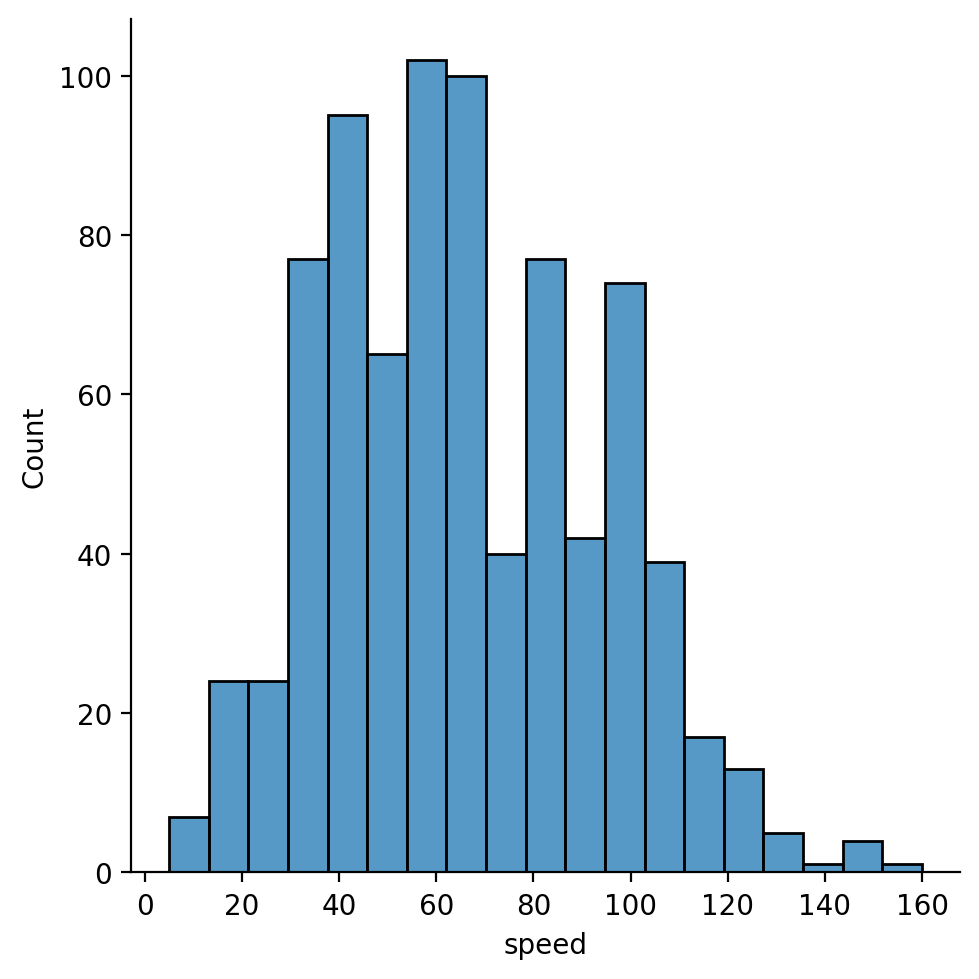

In [38]:
sns.displot(pokemon['speed']);

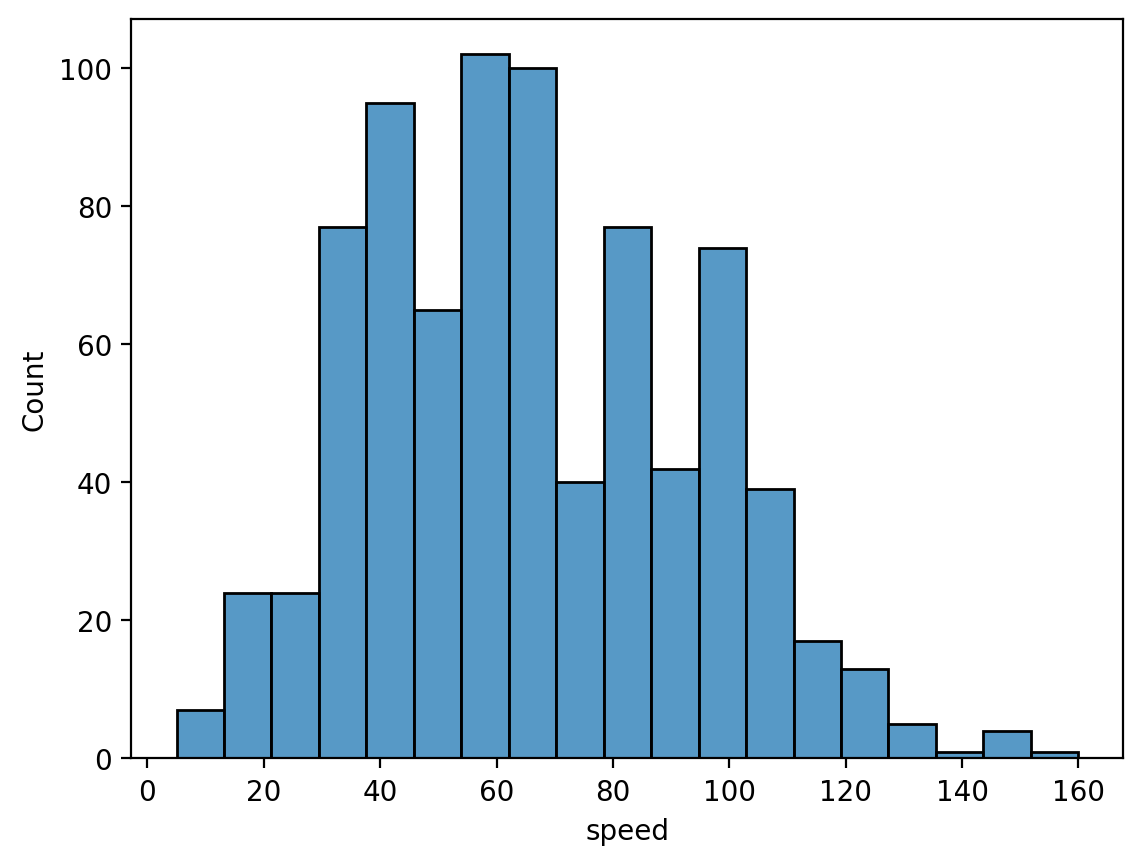

In [39]:
sns.histplot(pokemon['speed']);

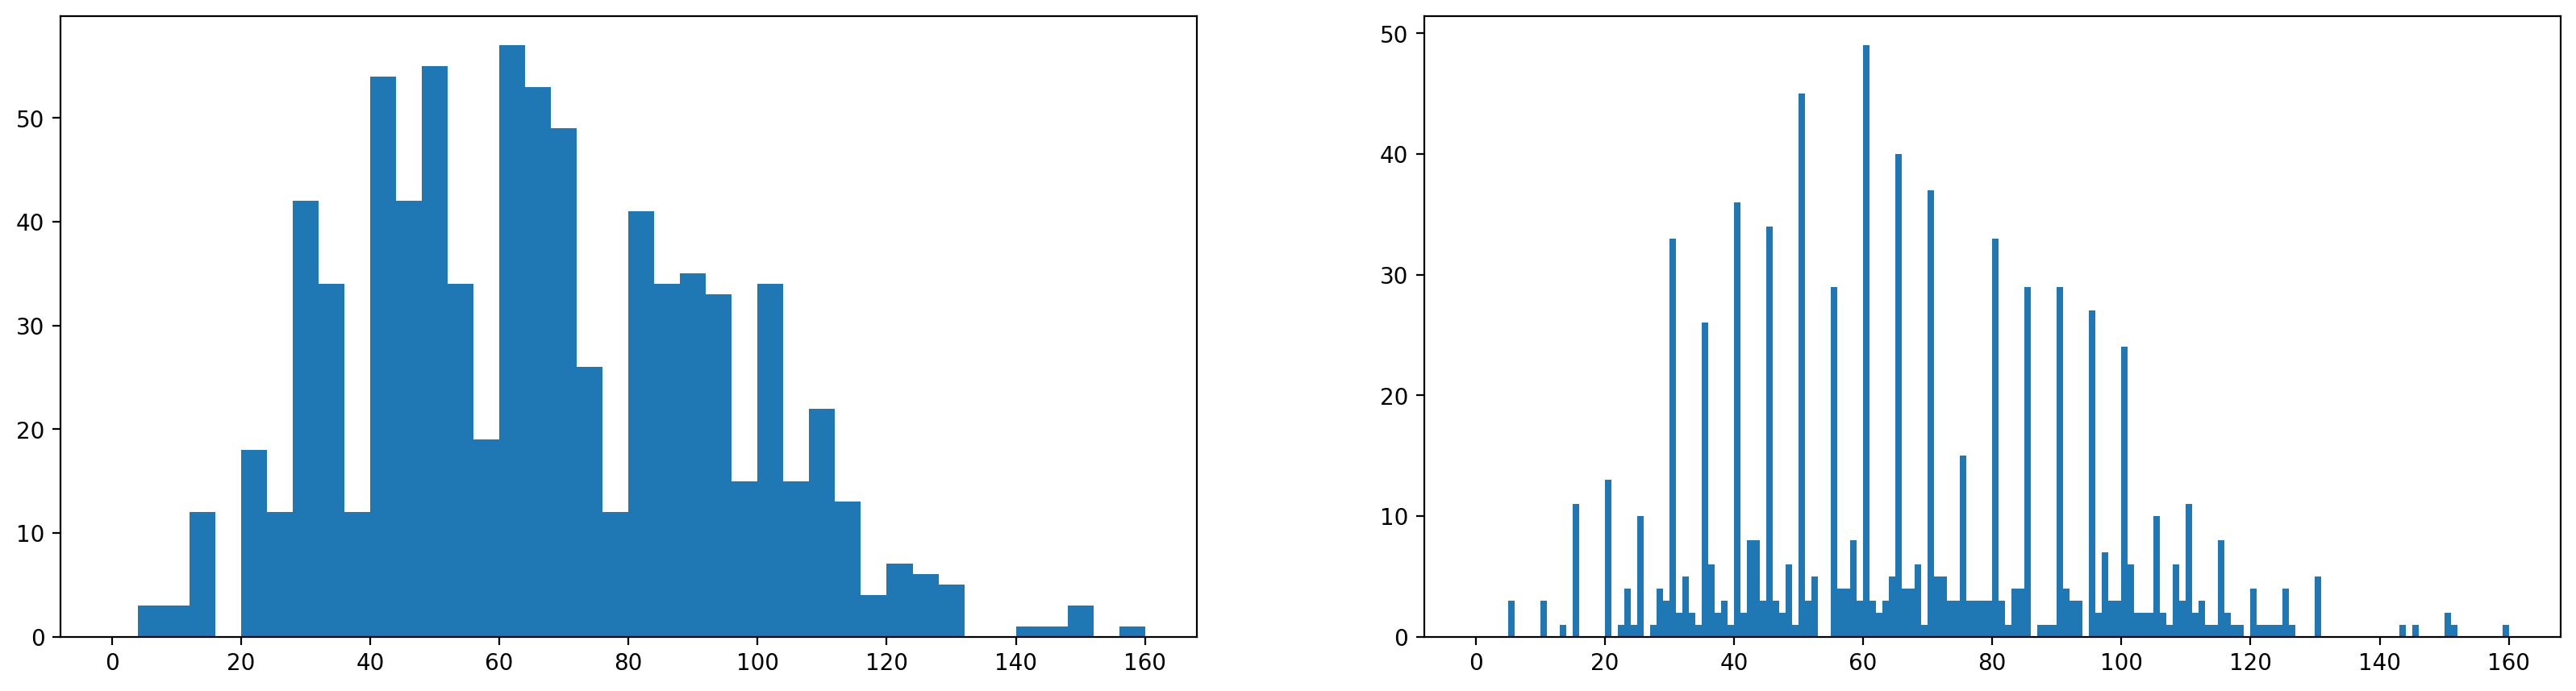

In [40]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)  # 1 row, 2 cols, subplot 1
bins = np.arange(0, pokemon['speed'].max() + 4, 4)
plt.hist(data=pokemon, x='speed', bins=bins);

plt.subplot(1, 2, 2)  # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max() + 1, 1)
plt.hist(data=pokemon, x='speed', bins=bins);

### Figures, Axes, and Subplots

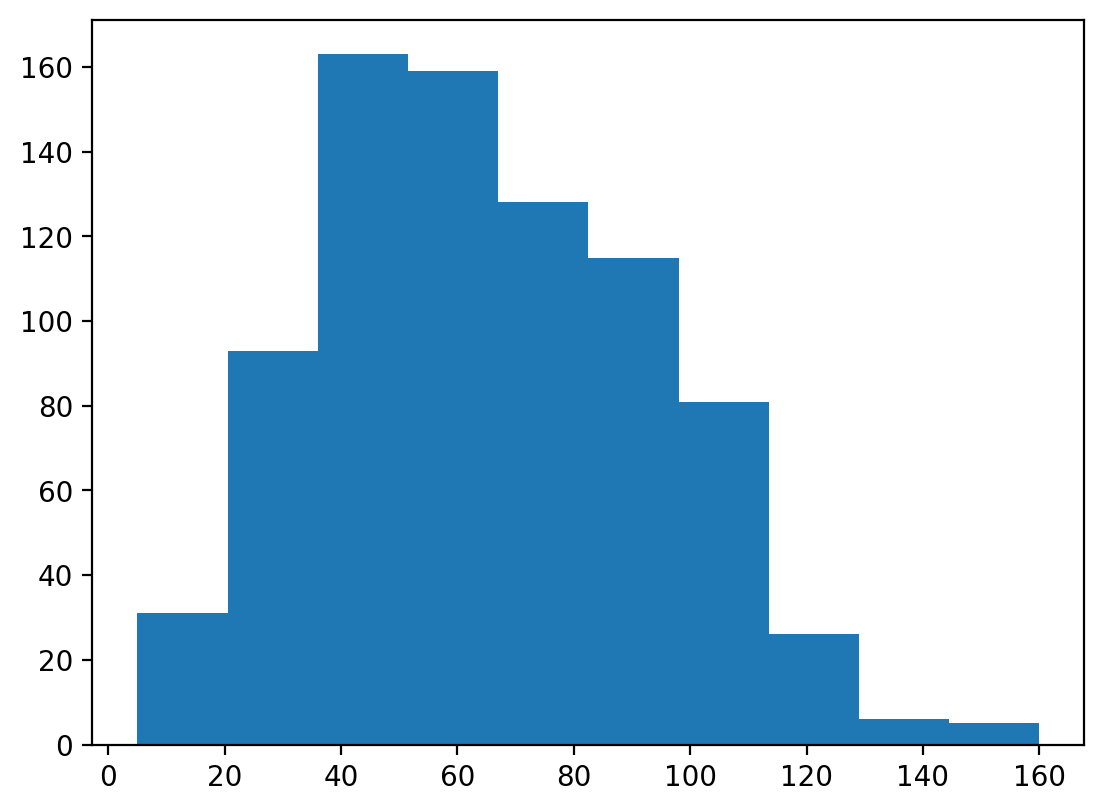

In [41]:
# Figure -> Axes -> Plot
fig = plt.figure()
# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes.
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

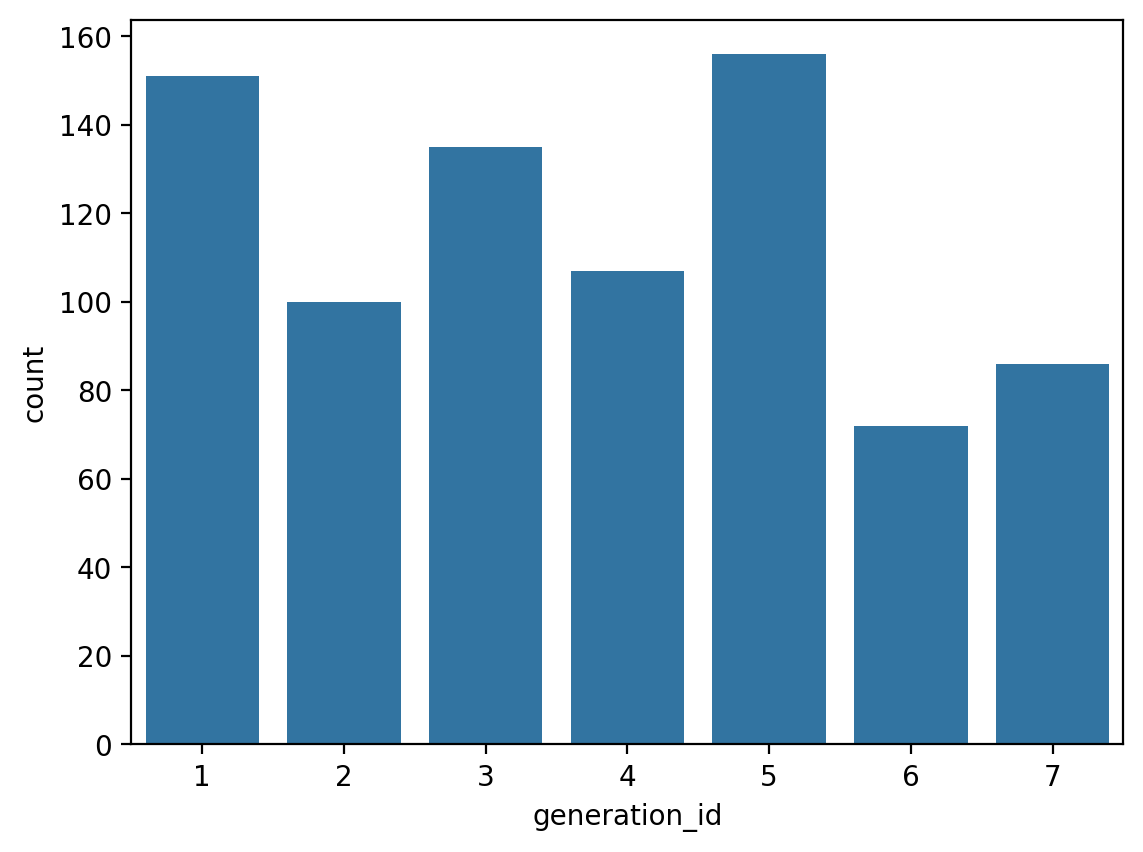

In [42]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sns.color_palette()[0]
sns.countplot(data=pokemon, x='generation_id', color=base_color, ax=ax);

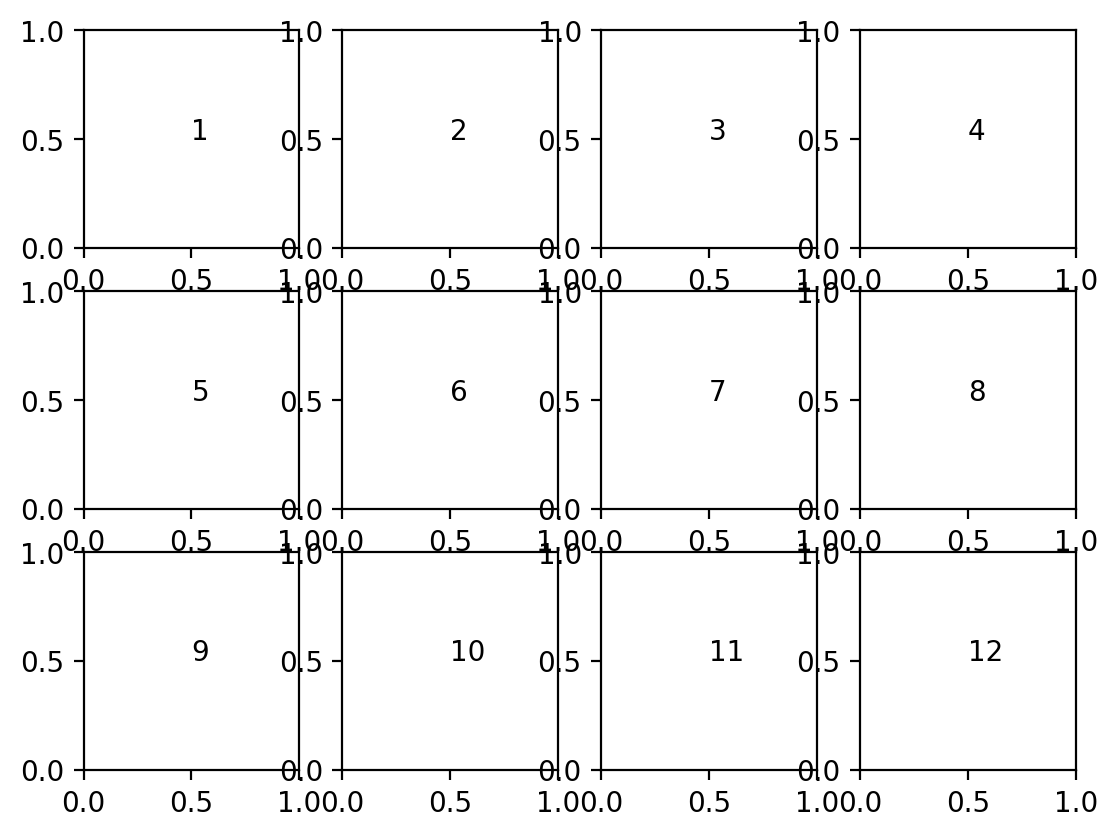

In [43]:
fig, axes = plt.subplots(3, 4)  # grid of 3x4 subplots
axes = axes.flatten()  # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i])  # set the current Axes
    plt.text(0.5, 0.5, i + 1)  # print conventional subplot index number to middle of Axes

### Choosing a Plot for Discrete Data

In [44]:
# Since data points fall on set values (bar-width), it can help to reduce ambiguity by putting bin edges between the actual values taken by the data.

In [45]:
die_rolls = pd.read_csv('../data/die_rolls.csv')
die_rolls.head(10)

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9
5,6,6,6,12
6,7,3,3,6
7,8,3,2,5
8,9,2,6,8
9,10,6,6,12


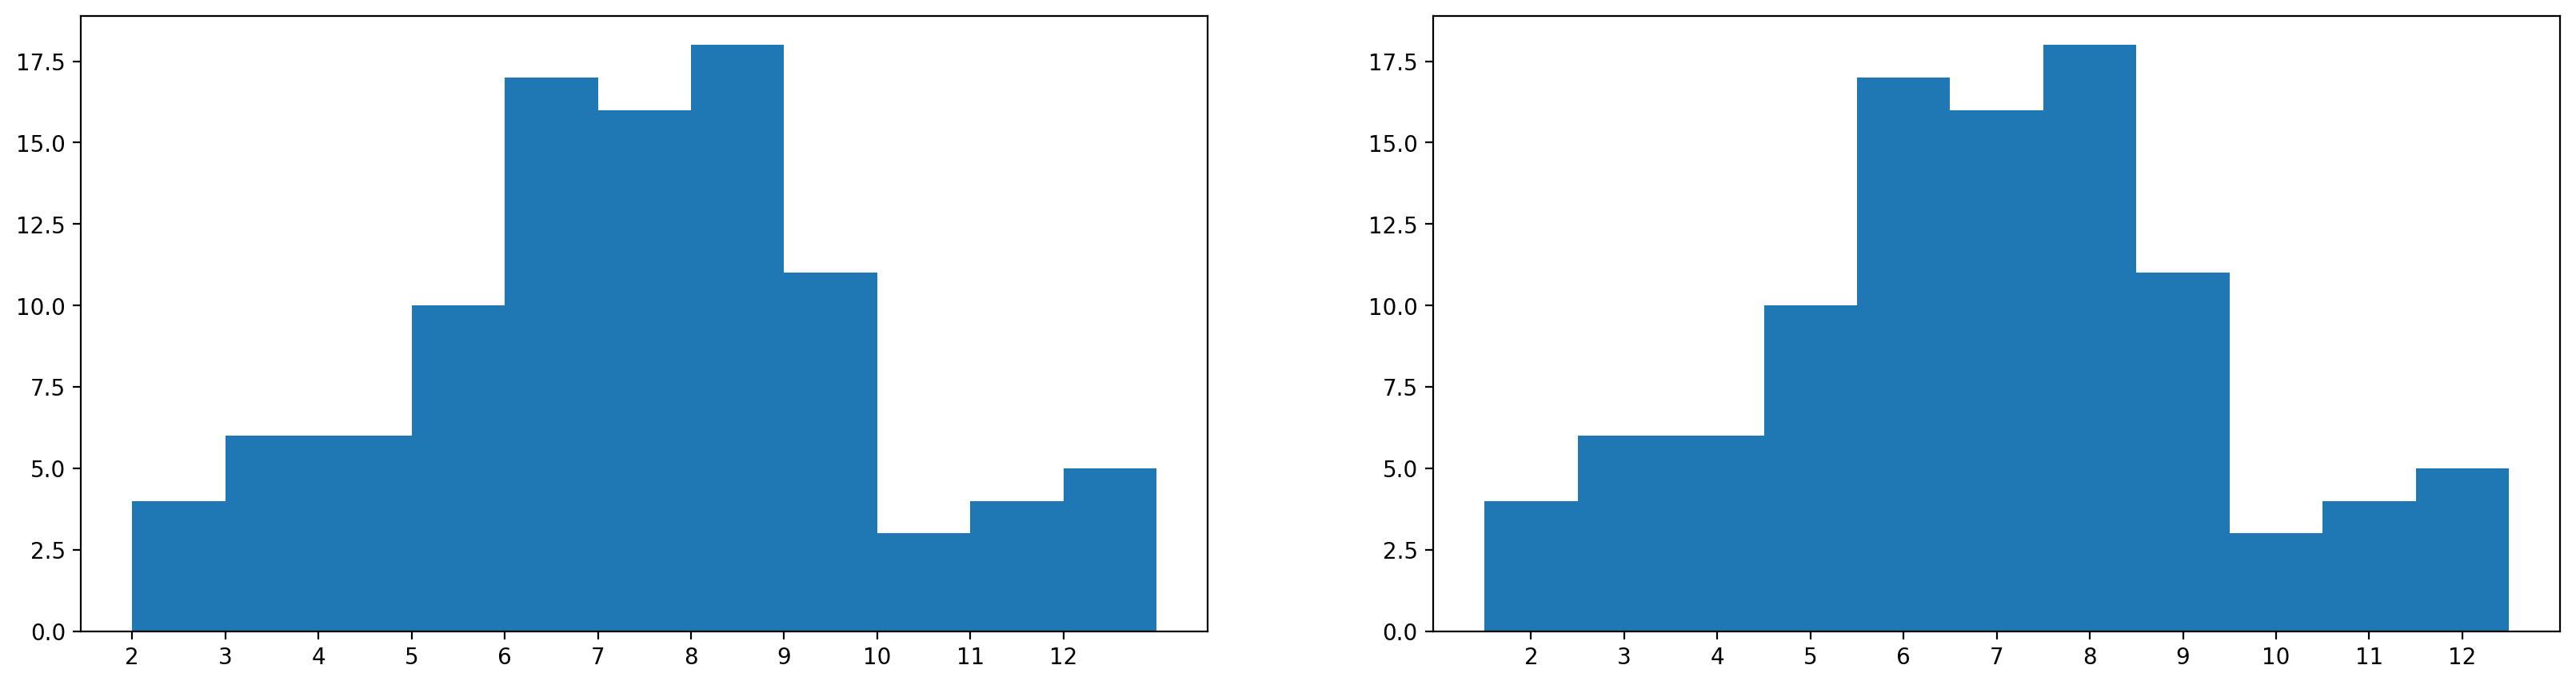

In [46]:
plt.figure(figsize=[20, 5])

# Histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12 + 1.1, 1)  # note `+1.1`, see below
plt.hist(data=die_rolls, x='Sum', bins=bin_edges);
plt.xticks(np.arange(2, 12 + 1, 1));

# Histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5 + 1, 1)
plt.hist(data=die_rolls, x='Sum', bins=bin_edges);
plt.xticks(np.arange(2, 12 + 1, 1));

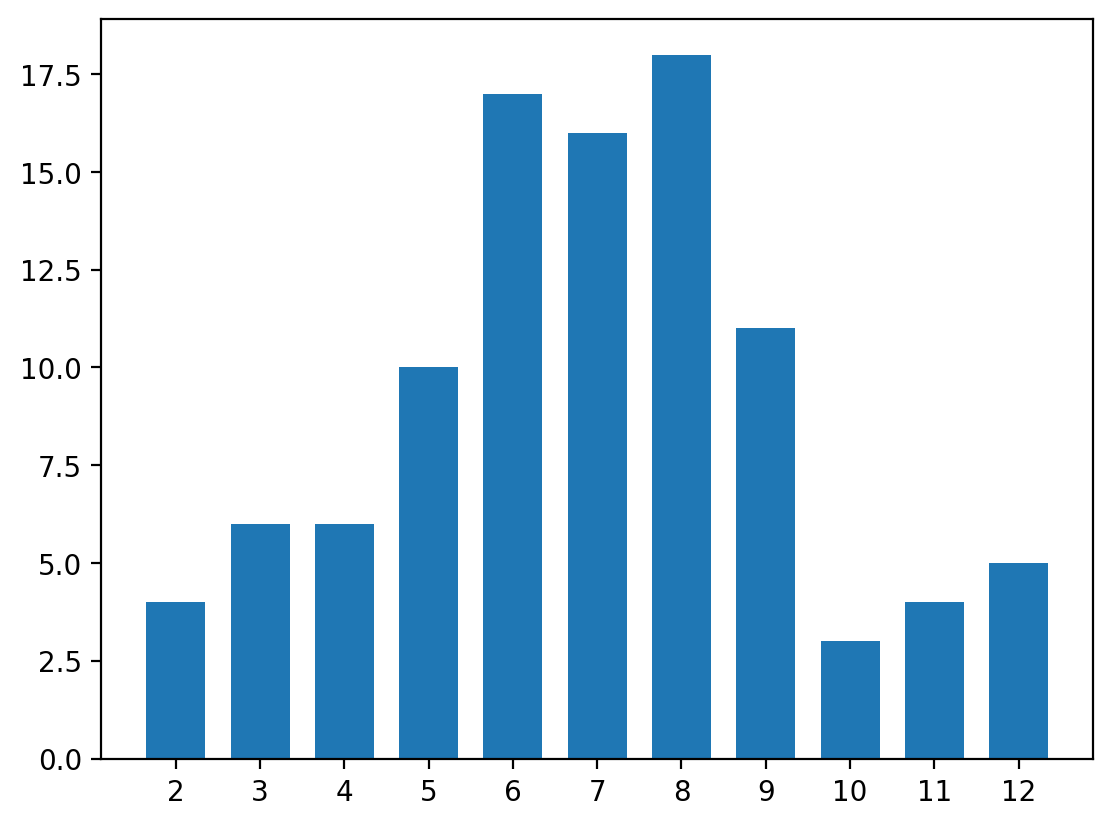

In [47]:
bin_edges = np.arange(1.5, 12.5 + 1, 1)
plt.hist(data=die_rolls, x='Sum', bins=bin_edges, rwidth=0.7)
plt.xticks(np.arange(2, 12 + 1, 1));

### Descriptive Statistics, Outliers and Axis Limits

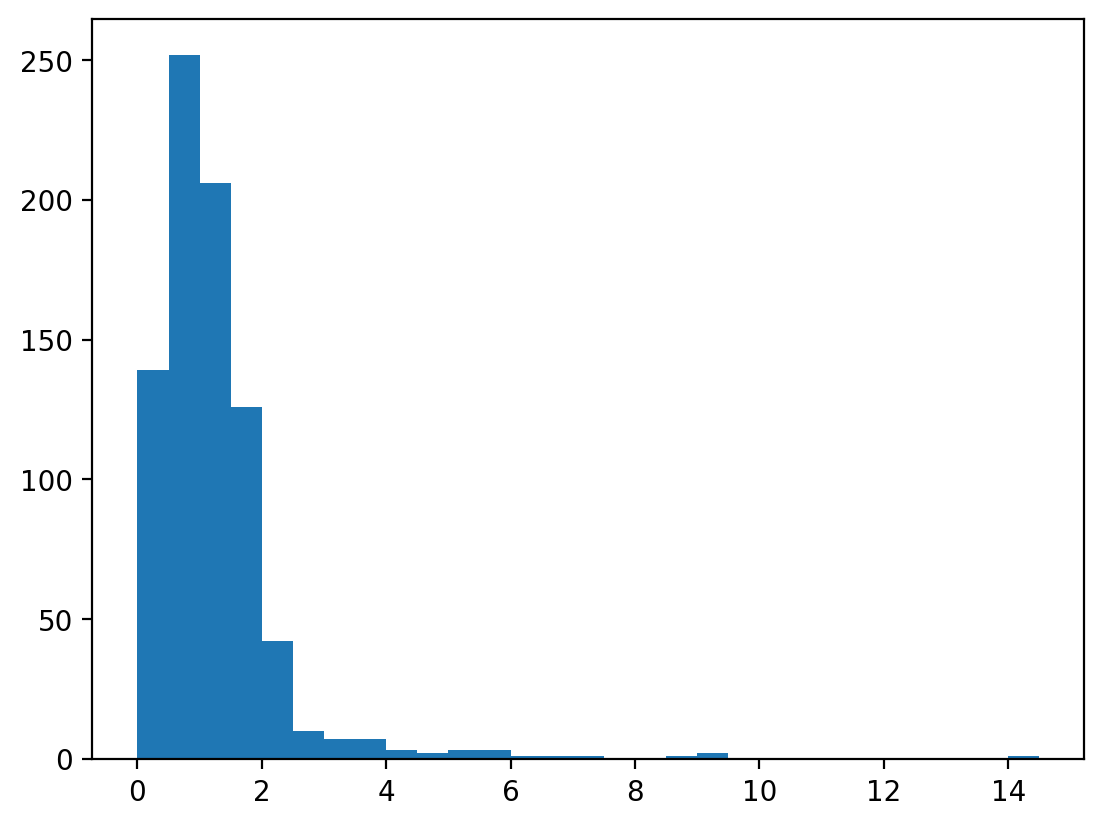

In [48]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max() + 0.5, 0.5)

plt.hist(data=pokemon, x='height', bins=bins);

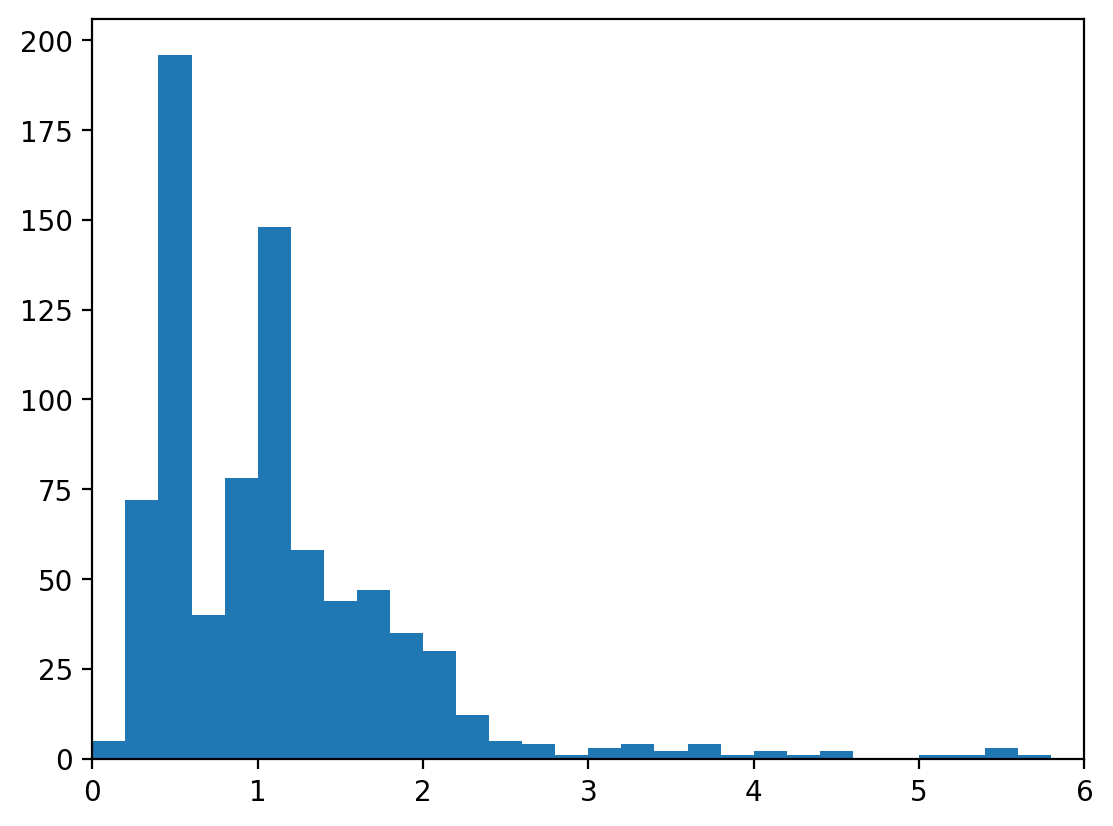

In [49]:
bins = np.arange(0, pokemon['height'].max() + 0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins)

# Set the upper and lower bounds of the bins that are displayed in the plot
plt.xlim((0, 6));
#plt.xlim(0,6)

### Scales and Transformations

Text(0.5, 0, 'The x-axis limits NOT are changed. They are only scaled to log-type')

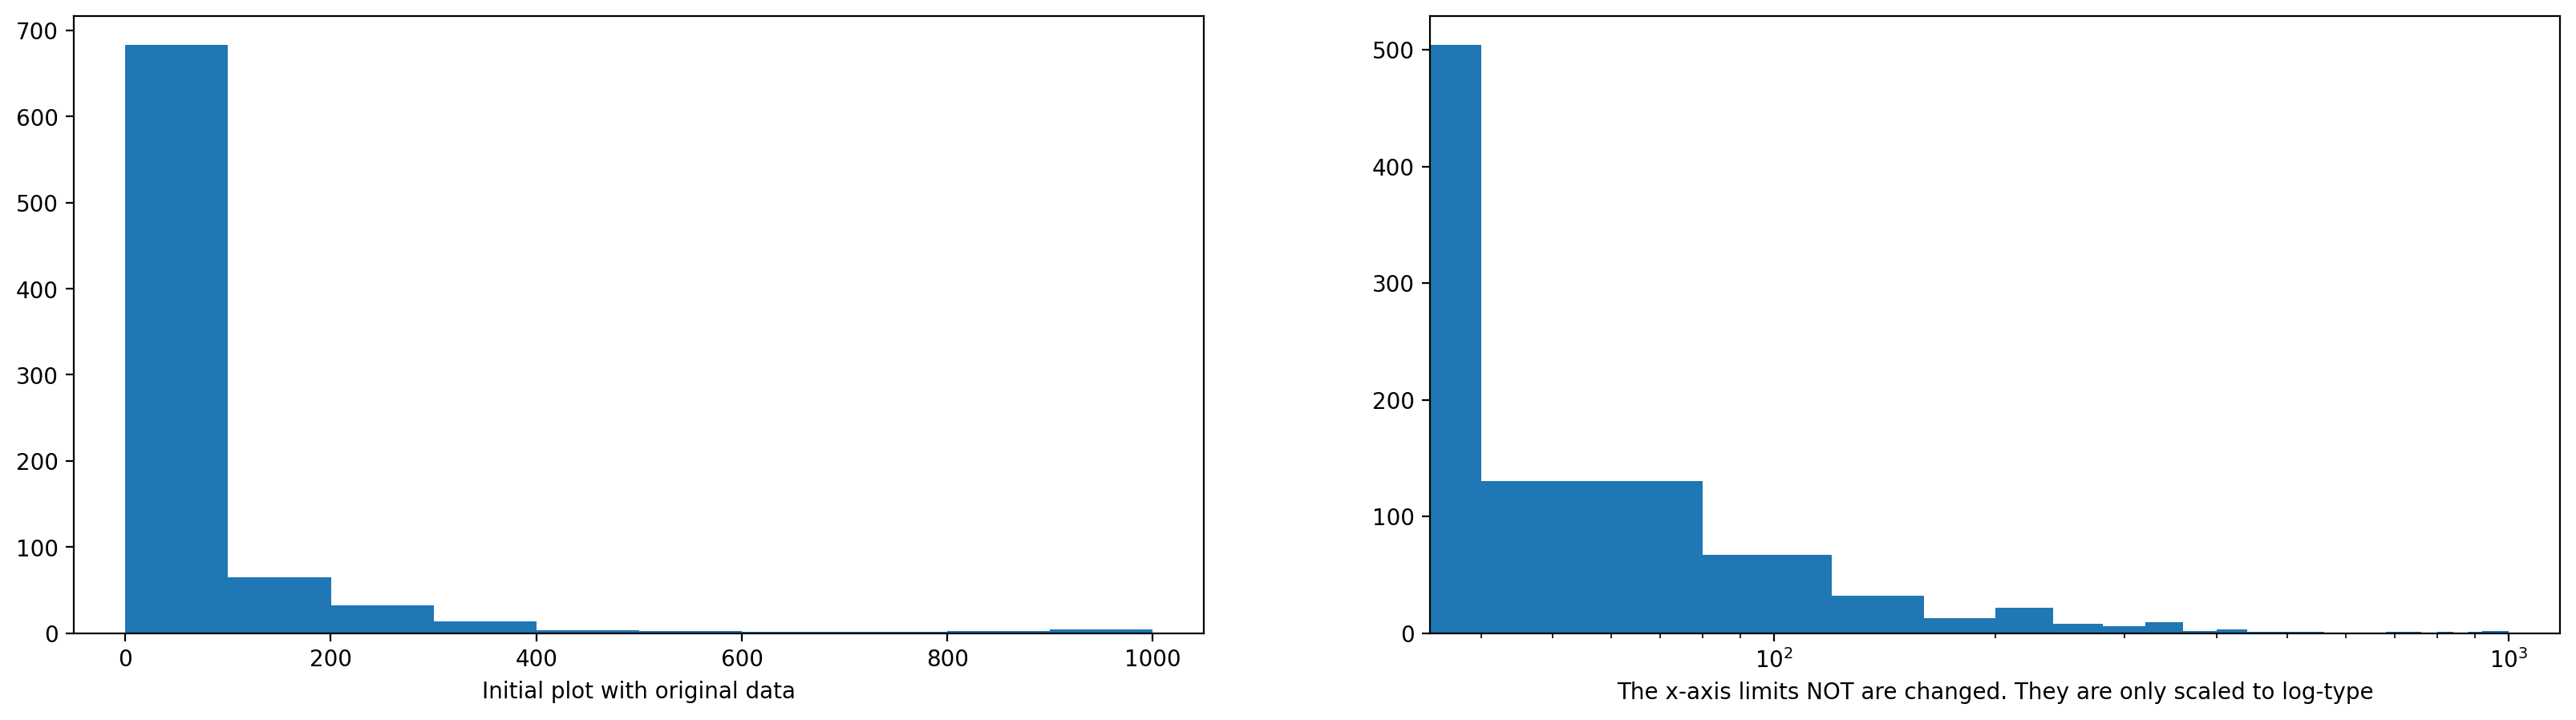

In [50]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
plt.xlabel('Initial plot with original data')

plt.subplot(1, 2, 2)
## Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max() + 40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

## The argument in the xscale() represents the axis scale type to apply.
## The possible values are: {"linear", "log", "symlog", "logit", ...}
## Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type')

In [51]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [52]:
## Transform the describe() to a scale of log10
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

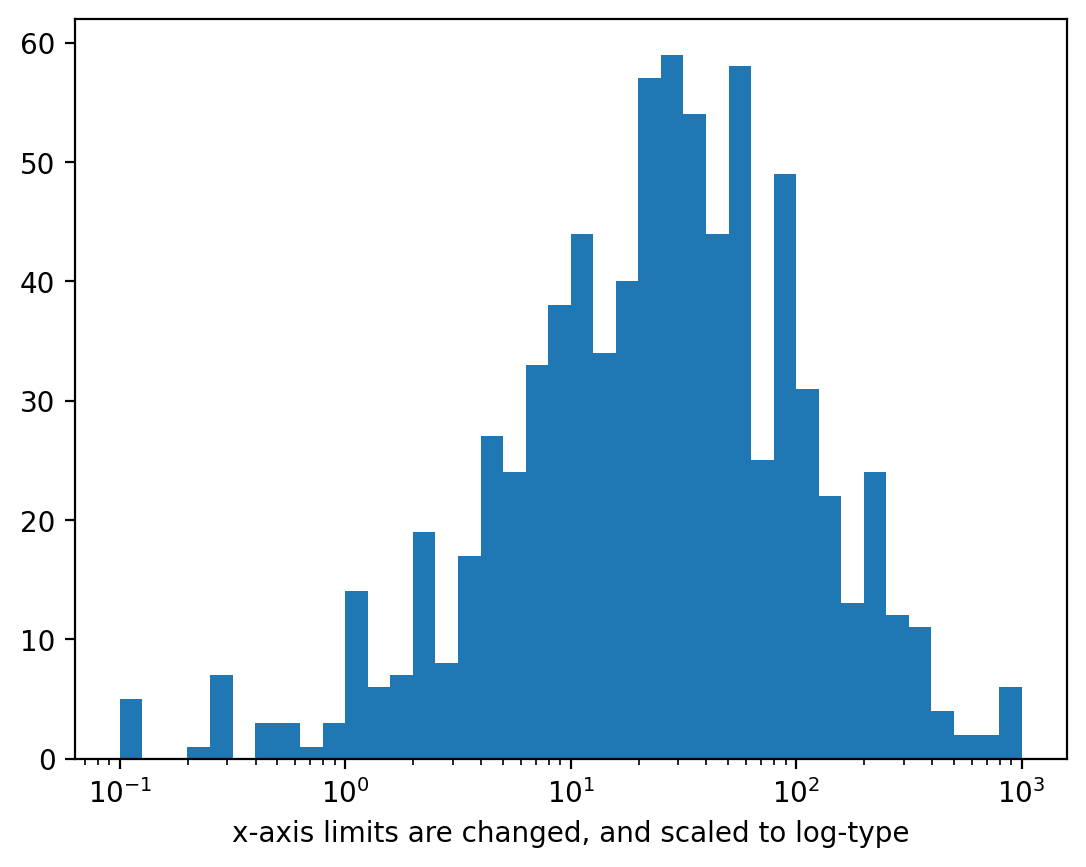

In [53]:
## Axis transformation
## Bin size
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins)

## The argument in the xscale() represents the axis scale type to apply.
## The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')
plt.xlabel('x-axis limits are changed, and scaled to log-type');

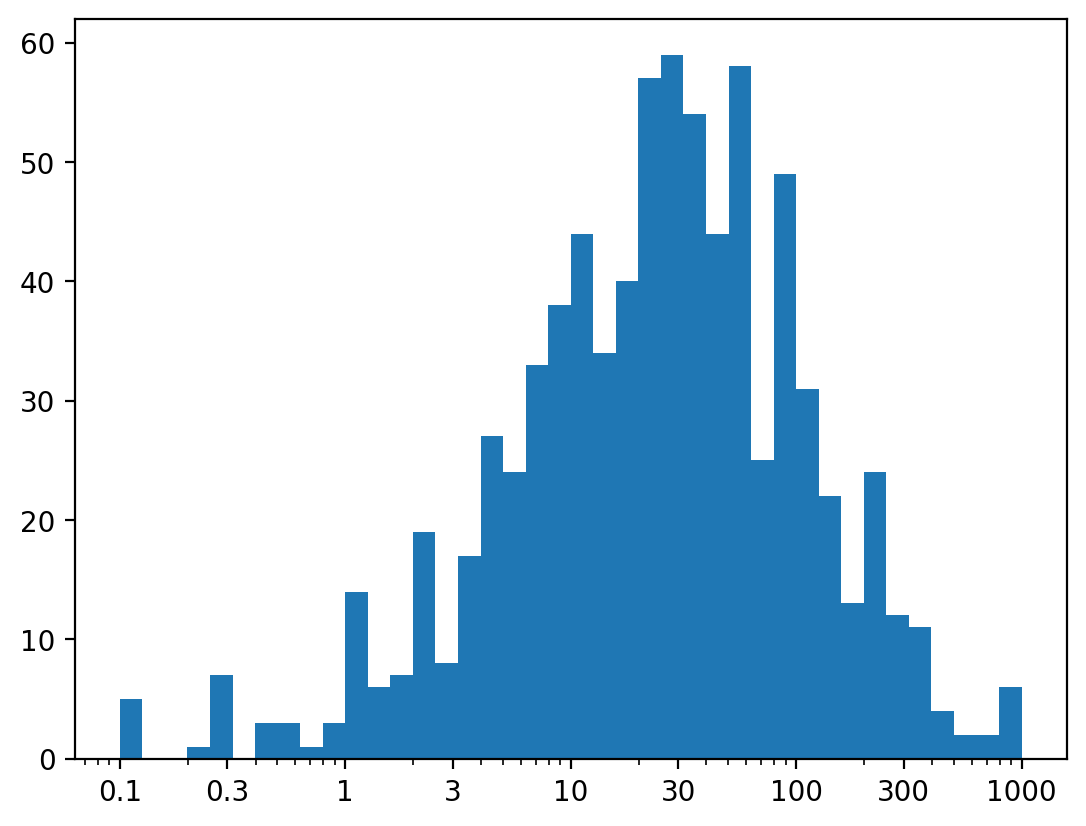

In [54]:
## Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
# print(bins)

ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=pokemon, x='weight', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels);

# Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.
# It is important that the xticks are specified after xscale since that function has its own built-in tick settings

In [1]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

## Bin resizing, to transform the x-axis
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

## Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

## Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

## Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

NameError: name 'np' is not defined

In [2]:
# Waffle Plots

# One alternative univariate plot type that you might see for categorical data is the waffle plot, also known as the square pie chart. 
# While the standard pie chart uses a circle to represent the whole, a waffle plot is plotted onto a square divided into a 10x10 grid. 
# Each small square in the grid represents one percent of the data, and a number of squares are colored by category to indicate total proportions. 

In [3]:
# There's no built-in function for waffle plots in Matplotlib or Seaborn, so we'll need to take some additional steps in order to build one with the tools available

def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)
    
    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1
    
    return counts

waffle_counts = percentage_blocks(df, 'cat_var')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')

NameError: name 'df' is not defined

In [4]:
# Other variants of the waffle plot exist to extend it beyond just displaying probabilities. 
# By associating each square with an amount rather than a percentage, we can use waffle plots to show absolute frequencies instead. 
# This might cause us to end up with something other than 100 squares.

In [5]:
# each box represents five full counts
waffle_counts = (df['cat_var'].value_counts() / 5).astype(int)

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10
    y = blocks // 10
    plt.bar(y, 0.8, 0.8, x)
    prev_count += waffle_counts[cat]

# box size legend
plt.bar(7.5, 0.8, 0.8, 2, color = 'white', edgecolor = 'black', lw = 2)
plt.text(8.1, 2.4,'= 5 data points', va = 'center')

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (0.8, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')

NameError: name 'df' is not defined

In [ ]:
# https://github.com/gyli/PyWaffle